In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file = 'titanic.csv'
df = pd.read_csv(file)
list(df)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

#### I began my assignment by comparing ticket price compared to passenger age to see if there was any sign of correlation between the two.  My results showed that the two variables are independent, with some surprising outlier ticket values above 500 dollars.  I was then interested to see if the expensive tickets were bought by the same family, which it turns out they did not.

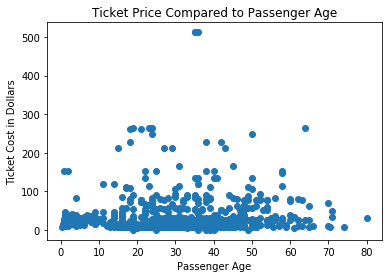

In [3]:
plt.scatter(x=df['Age'], y=df['Fare'])
plt.ylabel('Ticket Cost in Dollars')
plt.xlabel('Passenger Age')
plt.title('Ticket Price Compared to Passenger Age')
plt.show()

In [4]:
df[df['Fare'] > 500]['Name']

258                      Ward, Miss. Anna
679    Cardeza, Mr. Thomas Drake Martinez
737                Lesurer, Mr. Gustave J
Name: Name, dtype: object

#### I further analyzed my results by splitting the graph into male and female counterparts.  My results found that the two graphs were pretty similar, but it appeared that women had a higher frequency of high ticket costs.

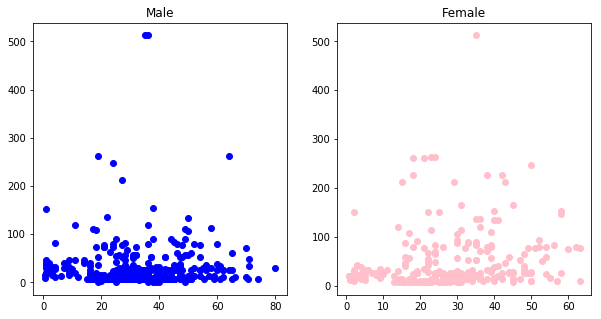

In [5]:
fig1 = df[df.Sex=="male"]
fig2 = df[df.Sex=="female"]

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.scatter(x=fig1['Age'],y=fig1['Fare'], color='blue')
plt.title("Male")

plt.subplot(1, 2, 2)
plt.scatter(x=fig2['Age'],y=fig2['Fare'], color='pink')
plt.title("Female")

plt.show()

#### Further comparing men and women ticket prices, I found the average price for the two to compare, and was surprised to see that women had close to double the average cost for a ticket than men.

In [6]:
print (df.groupby(['Sex'])['Fare'].mean())

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64


#### In order to make sure there weren't any values skewing the data I checked to see if there were any tickets that were recorded at 0 dollars.  Sure enough there were over 10 records that had no value for the ticket fare, and coincentally all of them were men.

In [7]:
print (df[df.Fare==0]['Sex'])

179    male
263    male
271    male
277    male
302    male
413    male
466    male
481    male
597    male
633    male
674    male
732    male
806    male
815    male
822    male
Name: Sex, dtype: object


#### I wondered if the average price for men's tickets was weighed down by the records of 0 dollar fares, so I removed them from the database then retested the mean.  While I did expect the average price to go up, I did not expect it to change by less than a dollar!

In [8]:
df = df[df.Fare >0]

In [9]:
print (df.groupby(['Sex'])['Fare'].mean())

Sex
female    44.479818
male      26.205136
Name: Fare, dtype: float64


#### Finally I compared the numbers of men and women on board the Titanic, as well as the survival rate.  While there were significantly less women on board, the majority of the survivors were women.  A possible reason for this discrepancy could be the belief that women and children should be rescued first.  There are other reasons to describe this, but I'd like to think that chivalry isn't dead after all.

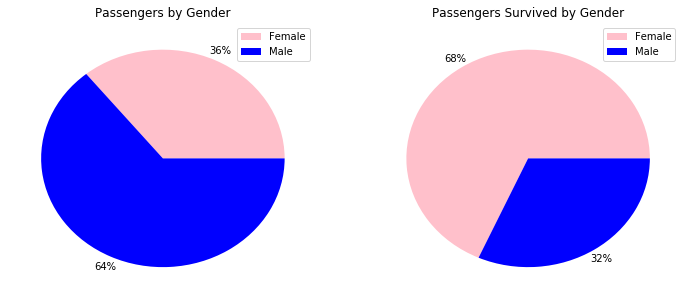

In [10]:
labels = ("Female", "Male")
colors = ("pink", "blue")

count_on_board = df.groupby(['Sex'])['Sex'].count()
count_survived = df.groupby(['Sex'])['Survived'].sum()

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.pie(count_on_board, colors=colors, autopct='%1.0f%%', pctdistance=1.1)
plt.title('Passengers by Gender')
plt.legend(labels)

plt.subplot(1, 2, 2)
plt.pie(count_survived, colors=colors, autopct='%1.0f%%', pctdistance=1.1)
plt.title('Passengers Survived by Gender')
plt.legend(labels)


plt.show()

#### Interesting fact - women were about 4x more likely to survive than men.

In [11]:
chance_for_survival = count_survived / count_on_board
print (chance_for_survival)

Sex
female    0.742038
male      0.192171
dtype: float64
